In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [2]:
train_data = pd.read_csv("./titanic/train.csv")
test_data = pd.read_csv("./titanic/test.csv")
len(train_data), len(test_data)

(891, 418)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

29.69911764705882


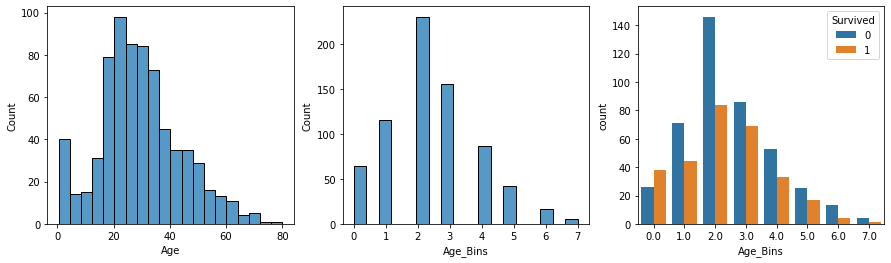

In [36]:
train_data_lite = train_data[ ~train_data['Age'].isna() ].copy()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
print(train_data_lite['Age'].mean())
sns.histplot(train_data_lite['Age'], ax=axs[0]);

train_data_lite['Age_Bins'] = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform').fit_transform(train_data_lite[['Age']])
sns.histplot(train_data_lite['Age_Bins'], ax=axs[1]);

sns.countplot(data=train_data_lite, x='Age_Bins', hue='Survived', ax=axs[2]);

32.2042079685746


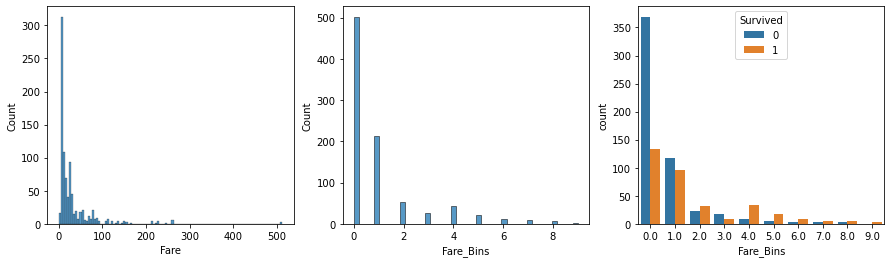

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
print(train_data['Fare'].mean())
sns.histplot(train_data['Fare'], ax=axs[0]);

train_data_lite = train_data[ ~train_data['Fare'].isna() ].copy()
train_data_lite['Fare_Bins'] = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans').fit_transform(train_data_lite[['Fare']])
sns.histplot(train_data_lite['Fare_Bins'], ax=axs[1]);

sns.countplot(data=train_data_lite, x='Fare_Bins', hue='Survived', ax=axs[2]);

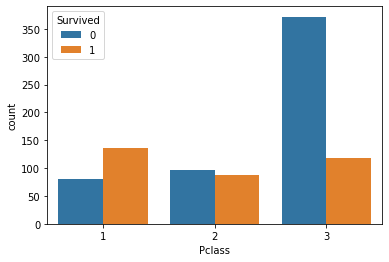

In [19]:
sns.countplot(data=train_data, x='Pclass', hue='Survived');

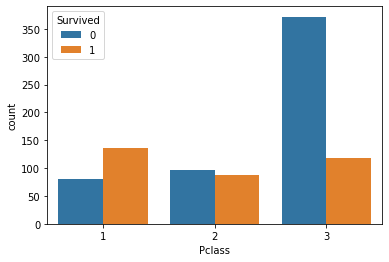

In [19]:
sns.countplot(data=train_data, x='Pclass', hue='Survived');

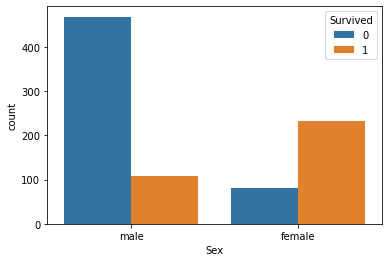

In [20]:
sns.countplot(data=train_data, x='Sex', hue='Survived');

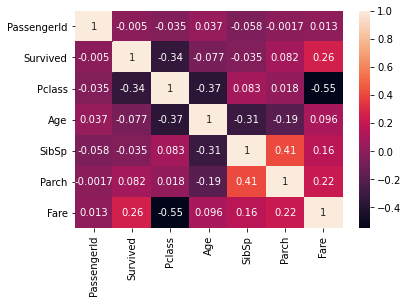

In [22]:
sns.heatmap(train_data.corr(), annot=True);
#train_data.corr().style.background_gradient('RdBu')

In [11]:
train_data['Parch'].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
train_data['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
train_data['Parch'] = Binarizer(threshold=0).fit_transform(train_data[['Parch']])
train_data['SibSp'] = Binarizer(threshold=0).fit_transform(train_data[['SibSp']])
train_data[['Parch','SibSp']].corr()

,Parch,SibSp
Parch,1.000000,0.420233
SibSp,0.420233,1.000000


In [9]:
train_data['CabinLetter'] = train_data['Cabin'].apply(lambda x : str(x)[0] if not pd.isna(x) else np.nan)
train_data['CabinLetter'].value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: CabinLetter, dtype: int64

In [10]:
test_data['CabinLetter'] = test_data['Cabin'].apply(lambda x : str(x)[0] if not pd.isna(x) else np.nan)
test_data['CabinLetter'].value_counts(dropna=False)

NaN    327
C       35
B       18
D       13
E        9
F        8
A        7
G        1
Name: CabinLetter, dtype: int64

In [11]:
for pclass in train_data['Pclass'].unique():
    print(pclass)
    print(train_data[ train_data['Pclass'] == pclass ]['CabinLetter'].value_counts(dropna=False))

3
NaN    479
F        5
G        4
E        3
Name: CabinLetter, dtype: int64
1
C      59
B      47
NaN    40
D      29
E      25
A      15
T       1
Name: CabinLetter, dtype: int64
2
NaN    168
F        8
E        4
D        4
Name: CabinLetter, dtype: int64


In [12]:
train_data.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [13]:
test_data.Sex.value_counts(dropna=False)

male      266
female    152
Name: Sex, dtype: int64